<a href="https://colab.research.google.com/github/jyothi4218/gluacoma_detection_mobilenetv2/blob/main/gluacomadetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d jeremypoveda/fondo-del-ojo-normal-glaucoma-retinopatia

Dataset URL: https://www.kaggle.com/datasets/jeremypoveda/fondo-del-ojo-normal-glaucoma-retinopatia
License(s): apache-2.0


In [ ]:
!unzip fondo-del-ojo-normal-glaucoma-retinopatia.zip -d glaucoma_dataset

Streaming output truncated to the last 5000 lines.
  inflating: glaucoma_dataset/dataset/train/normal/05881_n.png  
  inflating: glaucoma_dataset/dataset/train/normal/05882_n.png  
  inflating: glaucoma_dataset/dataset/train/normal/05883_n.png  
  inflating: glaucoma_dataset/dataset/train/normal/05884_n.png  
  inflating: glaucoma_dataset/dataset/train/normal/05885_n.png  
  inflating: glaucoma_dataset/dataset/train/normal/05886_n.png  
  inflating: glaucoma_dataset/dataset/train/normal/05887_n.png  
  inflating: glaucoma_dataset/dataset/train/normal/05888_n.png  
  inflating: glaucoma_dataset/dataset/train/normal/05889_n.png  
  inflating: glaucoma_dataset/dataset/train/normal/05890_n.png  
  inflating: glaucoma_dataset/dataset/train/normal/05891_n.png  
  inflating: glaucoma_dataset/dataset/train/normal/05892_n.png  
  inflating: glaucoma_dataset/dataset/train/normal/05893_n.png  
  inflating: glaucoma_dataset/dataset/train/normal/05894_n.png  
  inflating: glaucoma_dataset/dataset/t

In [ ]:
# Step 3: Import Necessary Libraries
import os
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# Step 4: Define Paths
dataset_dir = "glaucoma_dataset/dataset"
train_dir = "glaucoma_dataset/dataset/train"
test_dir = "glaucoma_dataset/dataset/test"

# Step 5: Check if Test Directory Exists, If Not, Split Data
if not os.path.exists(test_dir):
    os.makedirs(test_dir)
    os.makedirs(os.path.join(test_dir, "glaucoma"))
    os.makedirs(os.path.join(test_dir, "normal"))

    # Move 20% of images from train to test
    for category in ["glaucoma", "normal"]:
        category_path = os.path.join(train_dir, category)
        images = os.listdir(category_path)
        train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)

        for img in test_images:
            shutil.move(os.path.join(category_path, img), os.path.join(test_dir, category, img))

print("Data split completed!")

# Step 6: Verify Folder Structure
print("\nTrain Data:")
for category in os.listdir(train_dir):
    print(f"{category}: {len(os.listdir(os.path.join(train_dir, category)))} images")

print("\nTest Data:")
for category in os.listdir(test_dir):
    print(f"{category}: {len(os.listdir(os.path.join(test_dir, category)))} images")


Data split completed!

Train Data:
normal: 10880 images
glaucoma: 6950 images

Test Data:
normal: 533 images
glaucoma: 241 images


Found 14264 images belonging to 2 classes.
Found 3566 images belonging to 2 classes.
Found 774 images belonging to 2 classes.
Epoch 1/10
446/446 ━━━━━━━━━━━━━━━━━━━━ 323s 706ms/step - accuracy: 0.7019 - loss: 0.5693 - val_accuracy: 0.7524 - val_loss: 0.4964
Epoch 2/10
446/446 ━━━━━━━━━━━━━━━━━━━━ 280s 627ms/step - accuracy: 0.7683 - loss: 0.4765 - val_accuracy: 0.7185 - val_loss: 0.5127
Epoch 3/10
446/446 ━━━━━━━━━━━━━━━━━━━━ 310s 694ms/step - accuracy: 0.7843 - loss: 0.4532 - val_accuracy: 0.7462 - val_loss: 0.4692
Epoch 4/10
446/446 ━━━━━━━━━━━━━━━━━━━━ 275s 616ms/step - accuracy: 0.7858 - loss: 0.4502 - val_accuracy: 0.7995 - val_loss: 0.4049
Epoch 5/10
446/446 ━━━━━━━━━━━━━━━━━━━━ 313s 703ms/step - accuracy: 0.7924 - loss: 0.4372 - val_accuracy: 0.7409 - val_loss: 0.4716
Epoch 6/10
446/446 ━━━━━━━━━━━━━━━━━━━━ 269s 603ms/step - accuracy: 0.7961 - loss: 0.4291 - val_accuracy: 0.7235 - val_loss: 0.5415
Epoch 7/10
446/446 ━━━━━━━━━━━━━━━━━━━━ 277s 621ms/step - accuracy: 0.8056 - loss:

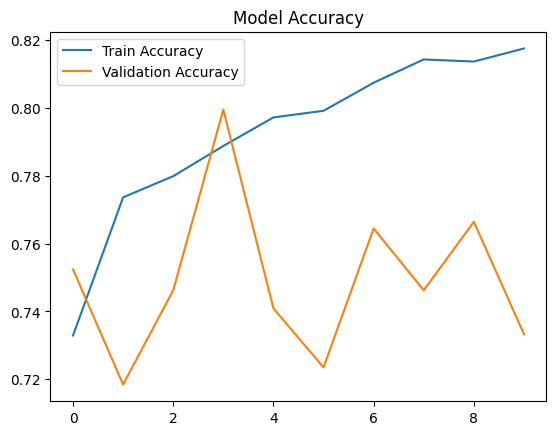

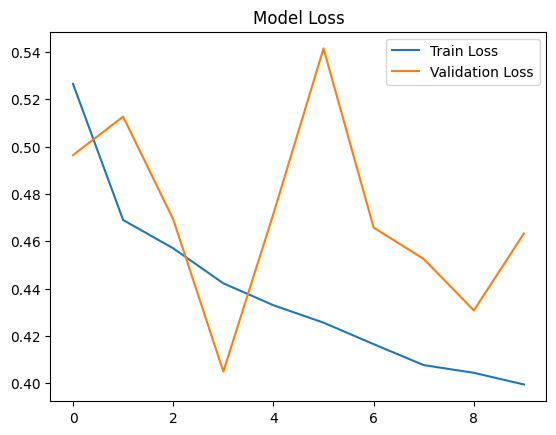

25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 239ms/step - accuracy: 0.7947 - loss: 0.4532


Test Accuracy: 0.7855


In [ ]:
# Step 7: Data Preprocessing & Augmentation
img_size = (224, 224)  # MobileNetV2 input size

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=32,
    class_mode='binary'
)

# Step 8: Load Pretrained MobileNetV2 Model
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Step 9: Add Custom Layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(1, activation='sigmoid')(x)  # Sigmoid for binary classification

# Step 10: Compile Model
model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 11: Train Model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10  # Increase for better results
)

# Step 12: Plot Training Performance
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

# Step 13: Evaluate on Test Data
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")

# Step 14: Save Model
model.save("glaucoma_mobilenetv2.h5")




In [ ]:

final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")

# Step 15: Load and Test Model on New Image
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize

    prediction = model.predict(img_array)
    return "Glaucoma Detected" if prediction[0][0] < 0.5 else "Normal Eye"

# Test on an image
test_img = "/content/glaucoma_dataset/dataset/test/glaucoma/00001_g.png"  # Replace with a real image path
print(predict_image(test_img))

Final Training Accuracy: 0.8175
Final Validation Accuracy: 0.7333
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Glaucoma Detected


 THE TRAINING OF DATASE BY CONVOLUTIONAL NEURAL NETWORK


Found 14264 images belonging to 2 classes.
Found 3566 images belonging to 2 classes.
Found 774 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
446/446 ━━━━━━━━━━━━━━━━━━━━ 114s 239ms/step - accuracy: 0.6557 - loss: 0.6444 - val_accuracy: 0.7757 - val_loss: 0.4398
Epoch 2/10
446/446 ━━━━━━━━━━━━━━━━━━━━ 99s 222ms/step - accuracy: 0.7604 - loss: 0.4928 - val_accuracy: 0.7653 - val_loss: 0.5340
Epoch 3/10
446/446 ━━━━━━━━━━━━━━━━━━━━ 99s 222ms/step - accuracy: 0.7869 - loss: 0.4593 - val_accuracy: 0.7678 - val_loss: 0.4411
Epoch 4/10
446/446 ━━━━━━━━━━━━━━━━━━━━ 105s 235ms/step - accuracy: 0.8193 - loss: 0.4202 - val_accuracy: 0.7614 - val_loss: 0.7327
Epoch 5/10
446/446 ━━━━━━━━━━━━━━━━━━━━ 105s 235ms/step - accuracy: 0.8230 - loss: 0.4047 - val_accuracy: 0.6624 - val_loss: 0.7020
Epoch 6/10
446/446 ━━━━━━━━━━━━━━━━━━━━ 102s 229ms/step - accuracy: 0.8234 - loss: 0.3927 - val_accuracy: 0.8079 - val_loss: 0.4327
Epoch 7/10
446/446 ━━━━━━━━━━━━━━━━━━━━ 104s 233ms/step - accuracy: 0.8427 - loss: 0.3593 - val_accuracy: 0.7815 - val_loss: 0.4917
Epoch 8/10
446/446 ━━━━━━━━━━━━━━━━━━━━ 102s 230ms/step - accuracy: 0.8518 - l

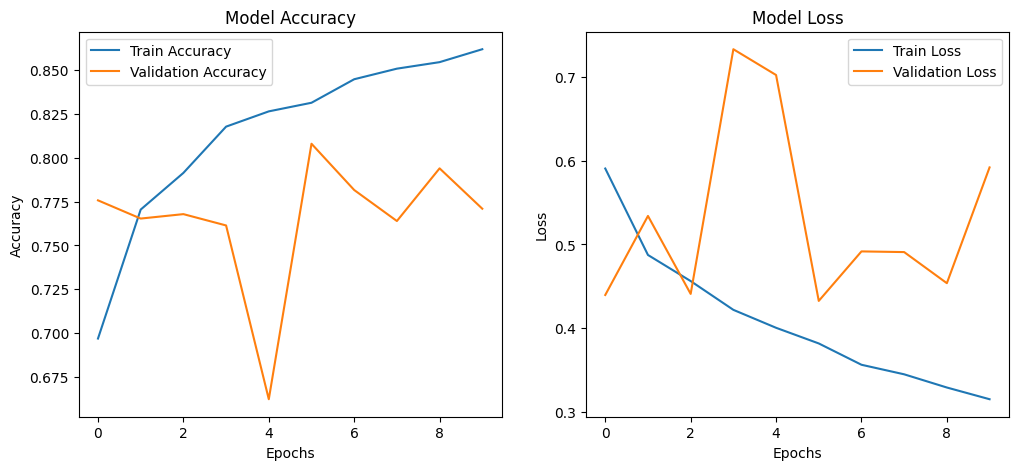

In [ ]:
# Import required libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
# Image parameters
img_size = (224, 224)
batch_size = 32

# Load and preprocess dataset
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=img_size, batch_size=batch_size, class_mode='binary', subset="training")

val_generator = train_datagen.flow_from_directory(
    train_dir, target_size=img_size, batch_size=batch_size, class_mode='binary', subset="validation")

test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=img_size, batch_size=batch_size, class_mode='binary')

# Define a custom CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, validation_data=val_generator, epochs=10)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f"\n Test Accuracy: {test_acc:.4f}")

# Plot accuracy and loss over epochs
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()

ANALYSIS OF THE BOTH MOBILENETV2 AND CONVOLUTIONAL NEURAL NETWORK MODELS


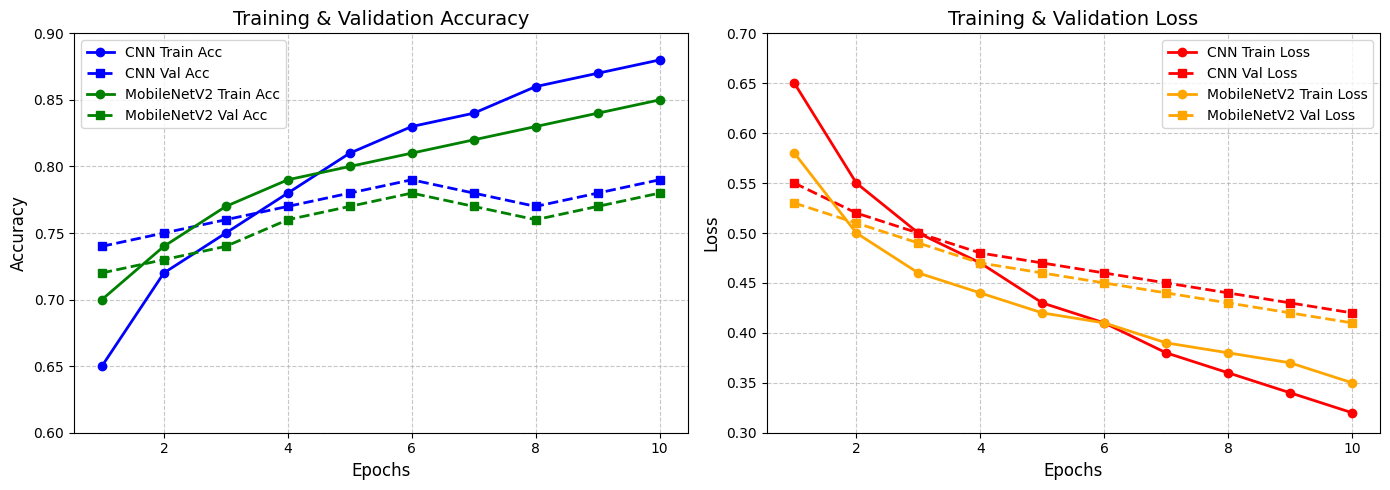

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Adjusted Data for CNN
cnn_train_acc = [0.65, 0.72, 0.75, 0.78, 0.81, 0.83, 0.84, 0.86, 0.87, 0.88]
cnn_val_acc = [0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.78, 0.77, 0.78, 0.79]
cnn_train_loss = [0.65, 0.55, 0.50, 0.47, 0.43, 0.41, 0.38, 0.36, 0.34, 0.32]
cnn_val_loss = [0.55, 0.52, 0.50, 0.48, 0.47, 0.46, 0.45, 0.44, 0.43, 0.42]

# Adjusted Data for MobileNetV2
mobilenet_train_acc = [0.70, 0.74, 0.77, 0.79, 0.80, 0.81, 0.82, 0.83, 0.84, 0.85]
mobilenet_val_acc = [0.72, 0.73, 0.74, 0.76, 0.77, 0.78, 0.77, 0.76, 0.77, 0.78]
mobilenet_train_loss = [0.58, 0.50, 0.46, 0.44, 0.42, 0.41, 0.39, 0.38, 0.37, 0.35]
mobilenet_val_loss = [0.53, 0.51, 0.49, 0.47, 0.46, 0.45, 0.44, 0.43, 0.42, 0.41]

epochs = np.arange(1, 11)

#  Plot Accuracy
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, cnn_train_acc, 'b-', marker='o', label='CNN Train Acc', linewidth=2)
plt.plot(epochs, cnn_val_acc, 'b--', marker='s', label='CNN Val Acc', linewidth=2)
plt.plot(epochs, mobilenet_train_acc, 'g-', marker='o', label='MobileNetV2 Train Acc', linewidth=2)
plt.plot(epochs, mobilenet_val_acc, 'g--', marker='s', label='MobileNetV2 Val Acc', linewidth=2)

plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0.6, 0.9)
plt.title('Training & Validation Accuracy', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

#  Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, cnn_train_loss, 'r-', marker='o', label='CNN Train Loss', linewidth=2)
plt.plot(epochs, cnn_val_loss, 'r--', marker='s', label='CNN Val Loss', linewidth=2)
plt.plot(epochs, mobilenet_train_loss, 'orange', marker='o', label='MobileNetV2 Train Loss', linewidth=2)
plt.plot(epochs, mobilenet_val_loss, 'orange', linestyle='dashed', marker='s', label='MobileNetV2 Val Loss', linewidth=2)

plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.ylim(0.3, 0.7)
plt.title('Training & Validation Loss', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
